In [14]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

In [20]:
# Load the JSON data from the file
with open('tracks.json', 'r', encoding='utf-8') as json_file:
    track_info_dicts = json.load(json_file)

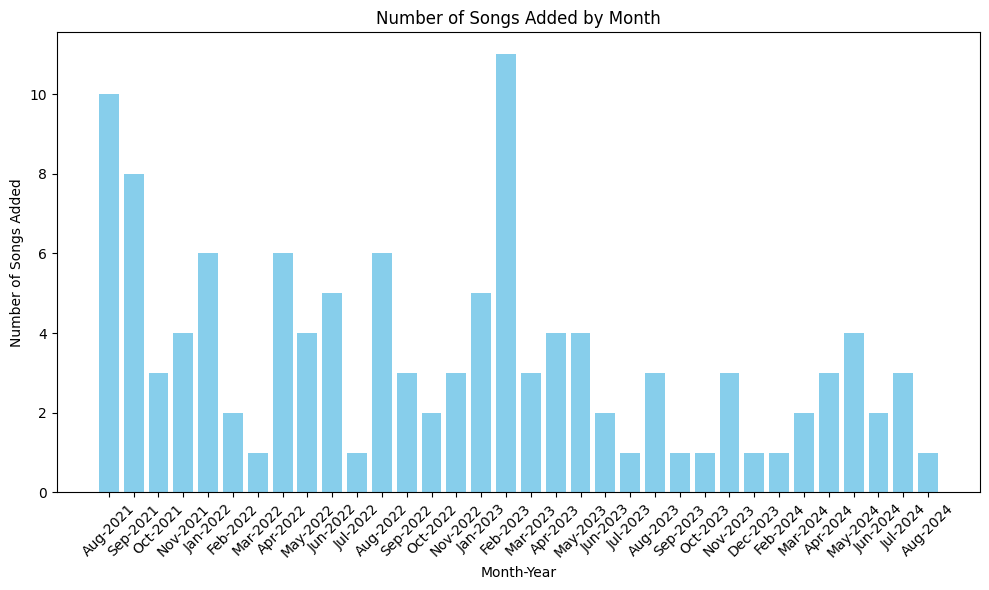

In [16]:
# Extract the dates and convert them to month-year format (e.g., "Aug-2024")
added_months = [datetime.strptime(track['added_at'], "%m-%d-%Y").strftime("%b-%Y") for track in track_info_dicts]

# Count how many tracks were added in each month
month_counter = Counter(added_months)

# Sort the months by date for plotting
sorted_months = sorted(month_counter.items(), key=lambda x: datetime.strptime(x[0], "%b-%Y"))

# Separate months and counts
months, counts = zip(*sorted_months)

# Plot the number of songs added per month
plt.figure(figsize=(10, 6))
plt.bar(months, counts, color='skyblue')

# Format the plot
plt.xlabel('Month-Year')
plt.ylabel('Number of Songs Added')
plt.title('Number of Songs Added by Month')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


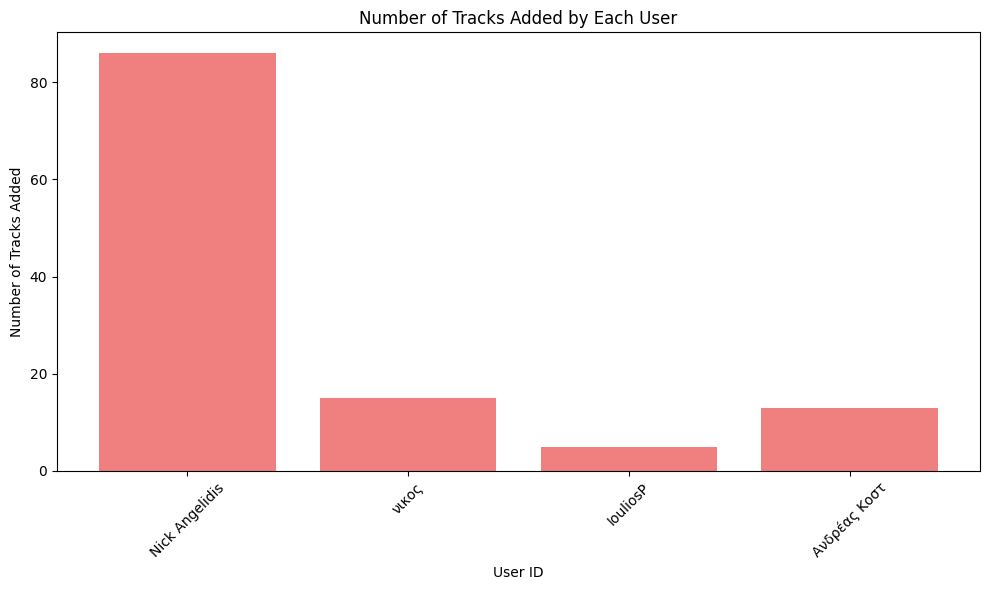

In [17]:
# Extract the user who added each track
users = [track['added_by'] for track in track_info_dicts]

# Count how many tracks were added by each user
user_counter = Counter(users)

# Separate users and their track counts
users, track_counts = zip(*user_counter.items())

# Plot the number of tracks added by each user
plt.figure(figsize=(10, 6))
plt.bar(users, track_counts, color='lightcoral')

# Format the plot
plt.xlabel('User ID')
plt.ylabel('Number of Tracks Added')
plt.title('Number of Tracks Added by Each User')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


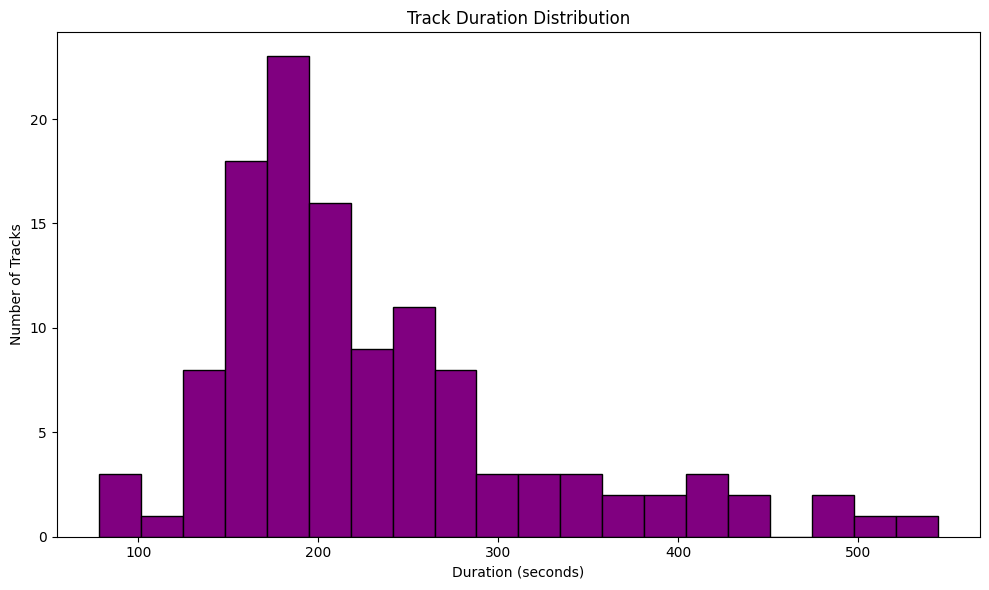

In [21]:
track_durations = [track['duration_ms'] / 60000 for track in track_info_dicts]  # Convert ms to minutes

# Plot a histogram of track durations
plt.figure(figsize=(10, 6))
plt.hist(track_durations, bins=20, color='purple', edgecolor='black')

# Format the plot
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Tracks')
plt.title('Track Duration Distribution')
plt.tight_layout()

# Show the plot
plt.show()


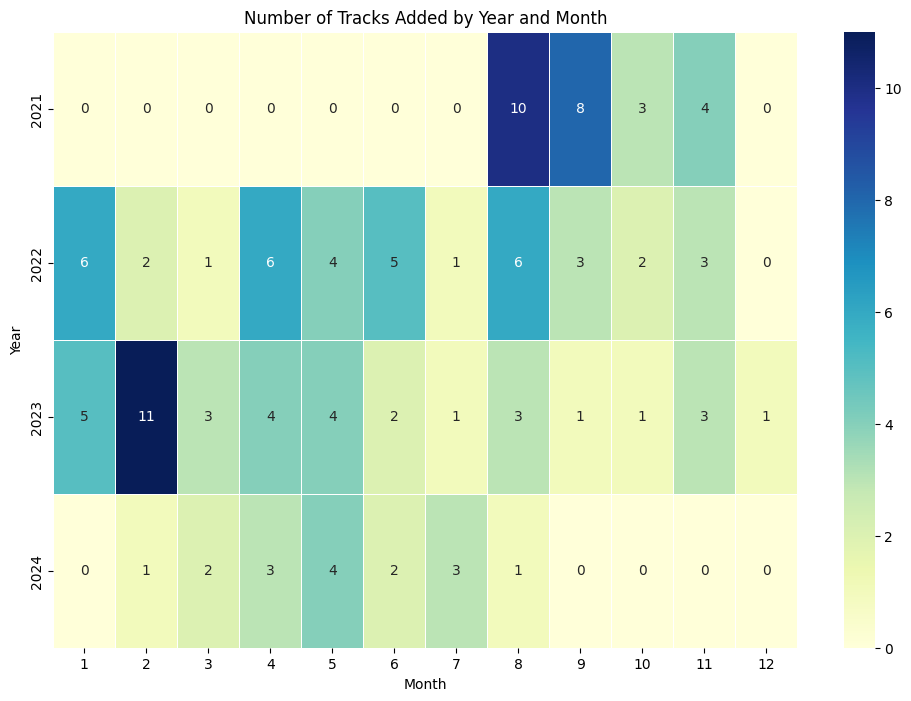

In [23]:
import seaborn as sns
import pandas as pd

# Create a DataFrame with the year and month of each track addition
track_data = pd.DataFrame({
    'year': [datetime.strptime(track['added_at'], "%m-%d-%Y").year for track in track_info_dicts],
    'month': [datetime.strptime(track['added_at'], "%m-%d-%Y").month for track in track_info_dicts]
})

# Count the number of tracks added for each year-month combination
heatmap_data = track_data.groupby(['year', 'month']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)

# Format the plot
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Number of Tracks Added by Year and Month')

plt.show()
